# **Task 3: Exploratory Data Analysis - Retail**
# **Submitted by: Gunjan Vazirani**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:

df=pd.read_csv('SampleSuperstore.csv')
df.head()
df.shape

(9994, 13)

# New Section

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [143]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [144]:
df=df.drop_duplicates()
df.shape

(9977, 13)

Text(0, 0.5, 'Profit')

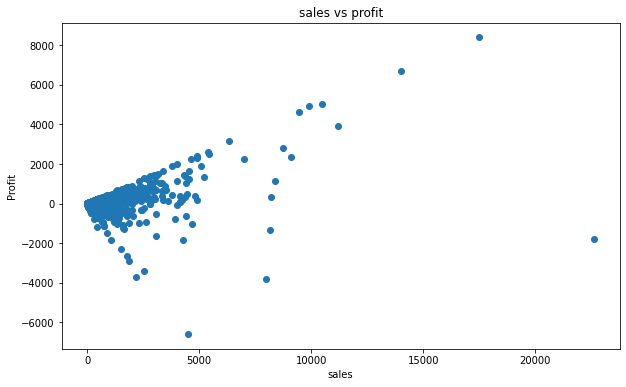

In [145]:
X=np.array(df['Sales']).reshape(-1,1)
y=np.array(df['Profit']).reshape(-1,1)
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('sales vs profit')
plt.xlabel('sales')
plt.ylabel('Profit')

In [146]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

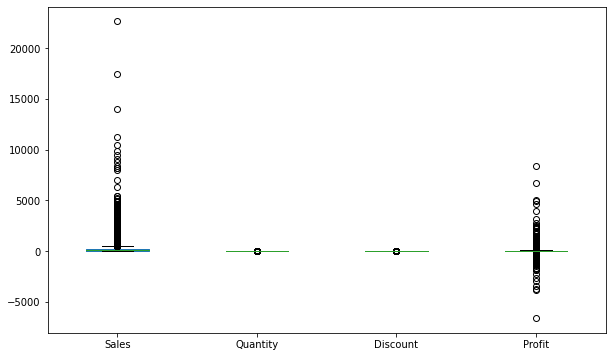

In [147]:
df_num=df[['Sales','Quantity','Discount','Profit']]
df_num.plot(kind='box',figsize=(10,6),vert=True)

In [148]:
category = df.groupby(by='Category').agg('sum').reset_index()
category.drop(['Postal Code'],axis=1)
category

,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,118006465,741306.3133,8020,368.59,18421.8137
1,Office Supplies,329670858,718735.2440,22861,946.20,122364.6608
2,Technology,102603754,836154.0330,6939,244.40,145454.9481


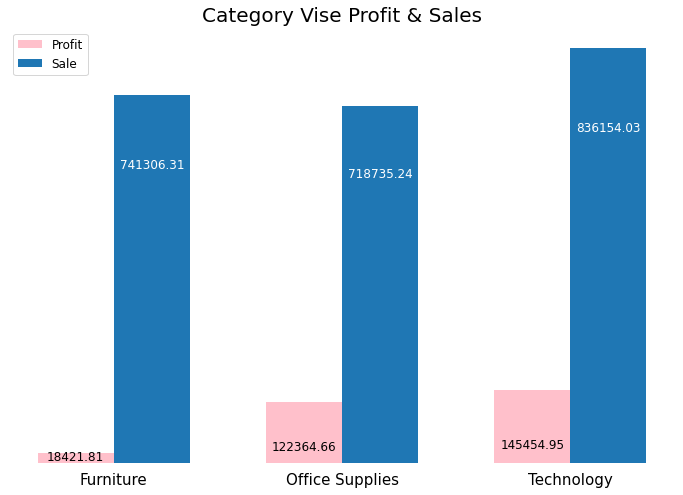

In [149]:
net_profit=category['Profit']
sales=category['Sales']
x= np.array(range(0,9,3))
fig1=plt.figure(figsize=(12,8))
plt.title("Category Vise Profit & Sales",fontsize=20)
bars = plt.bar(x-0.5,net_profit,width=1,color='pink',label='Profit')
bars2 = plt.bar(x+0.5,category['Sales'],width=1,label='Sale')

ax = plt.gca().axes
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

for bar,bar2,profit,sale,label in zip(bars,bars2,net_profit,sales,category['Category']):
    
    ax.text(bar.get_x()+bar.get_width()/2,profit*0.2,str(round(profit,2)),horizontalalignment='center',color='black',fontsize=12)
    ax.text(bar2.get_x()+bar.get_width()/2,sale*0.8,str(round(sale,2)),horizontalalignment='center',color='white',fontsize=12)
    ax.text(bar2.get_x(),-45000,label,horizontalalignment='center',color='black',fontsize=15)

plt.legend(fontsize=12)
plt.show()

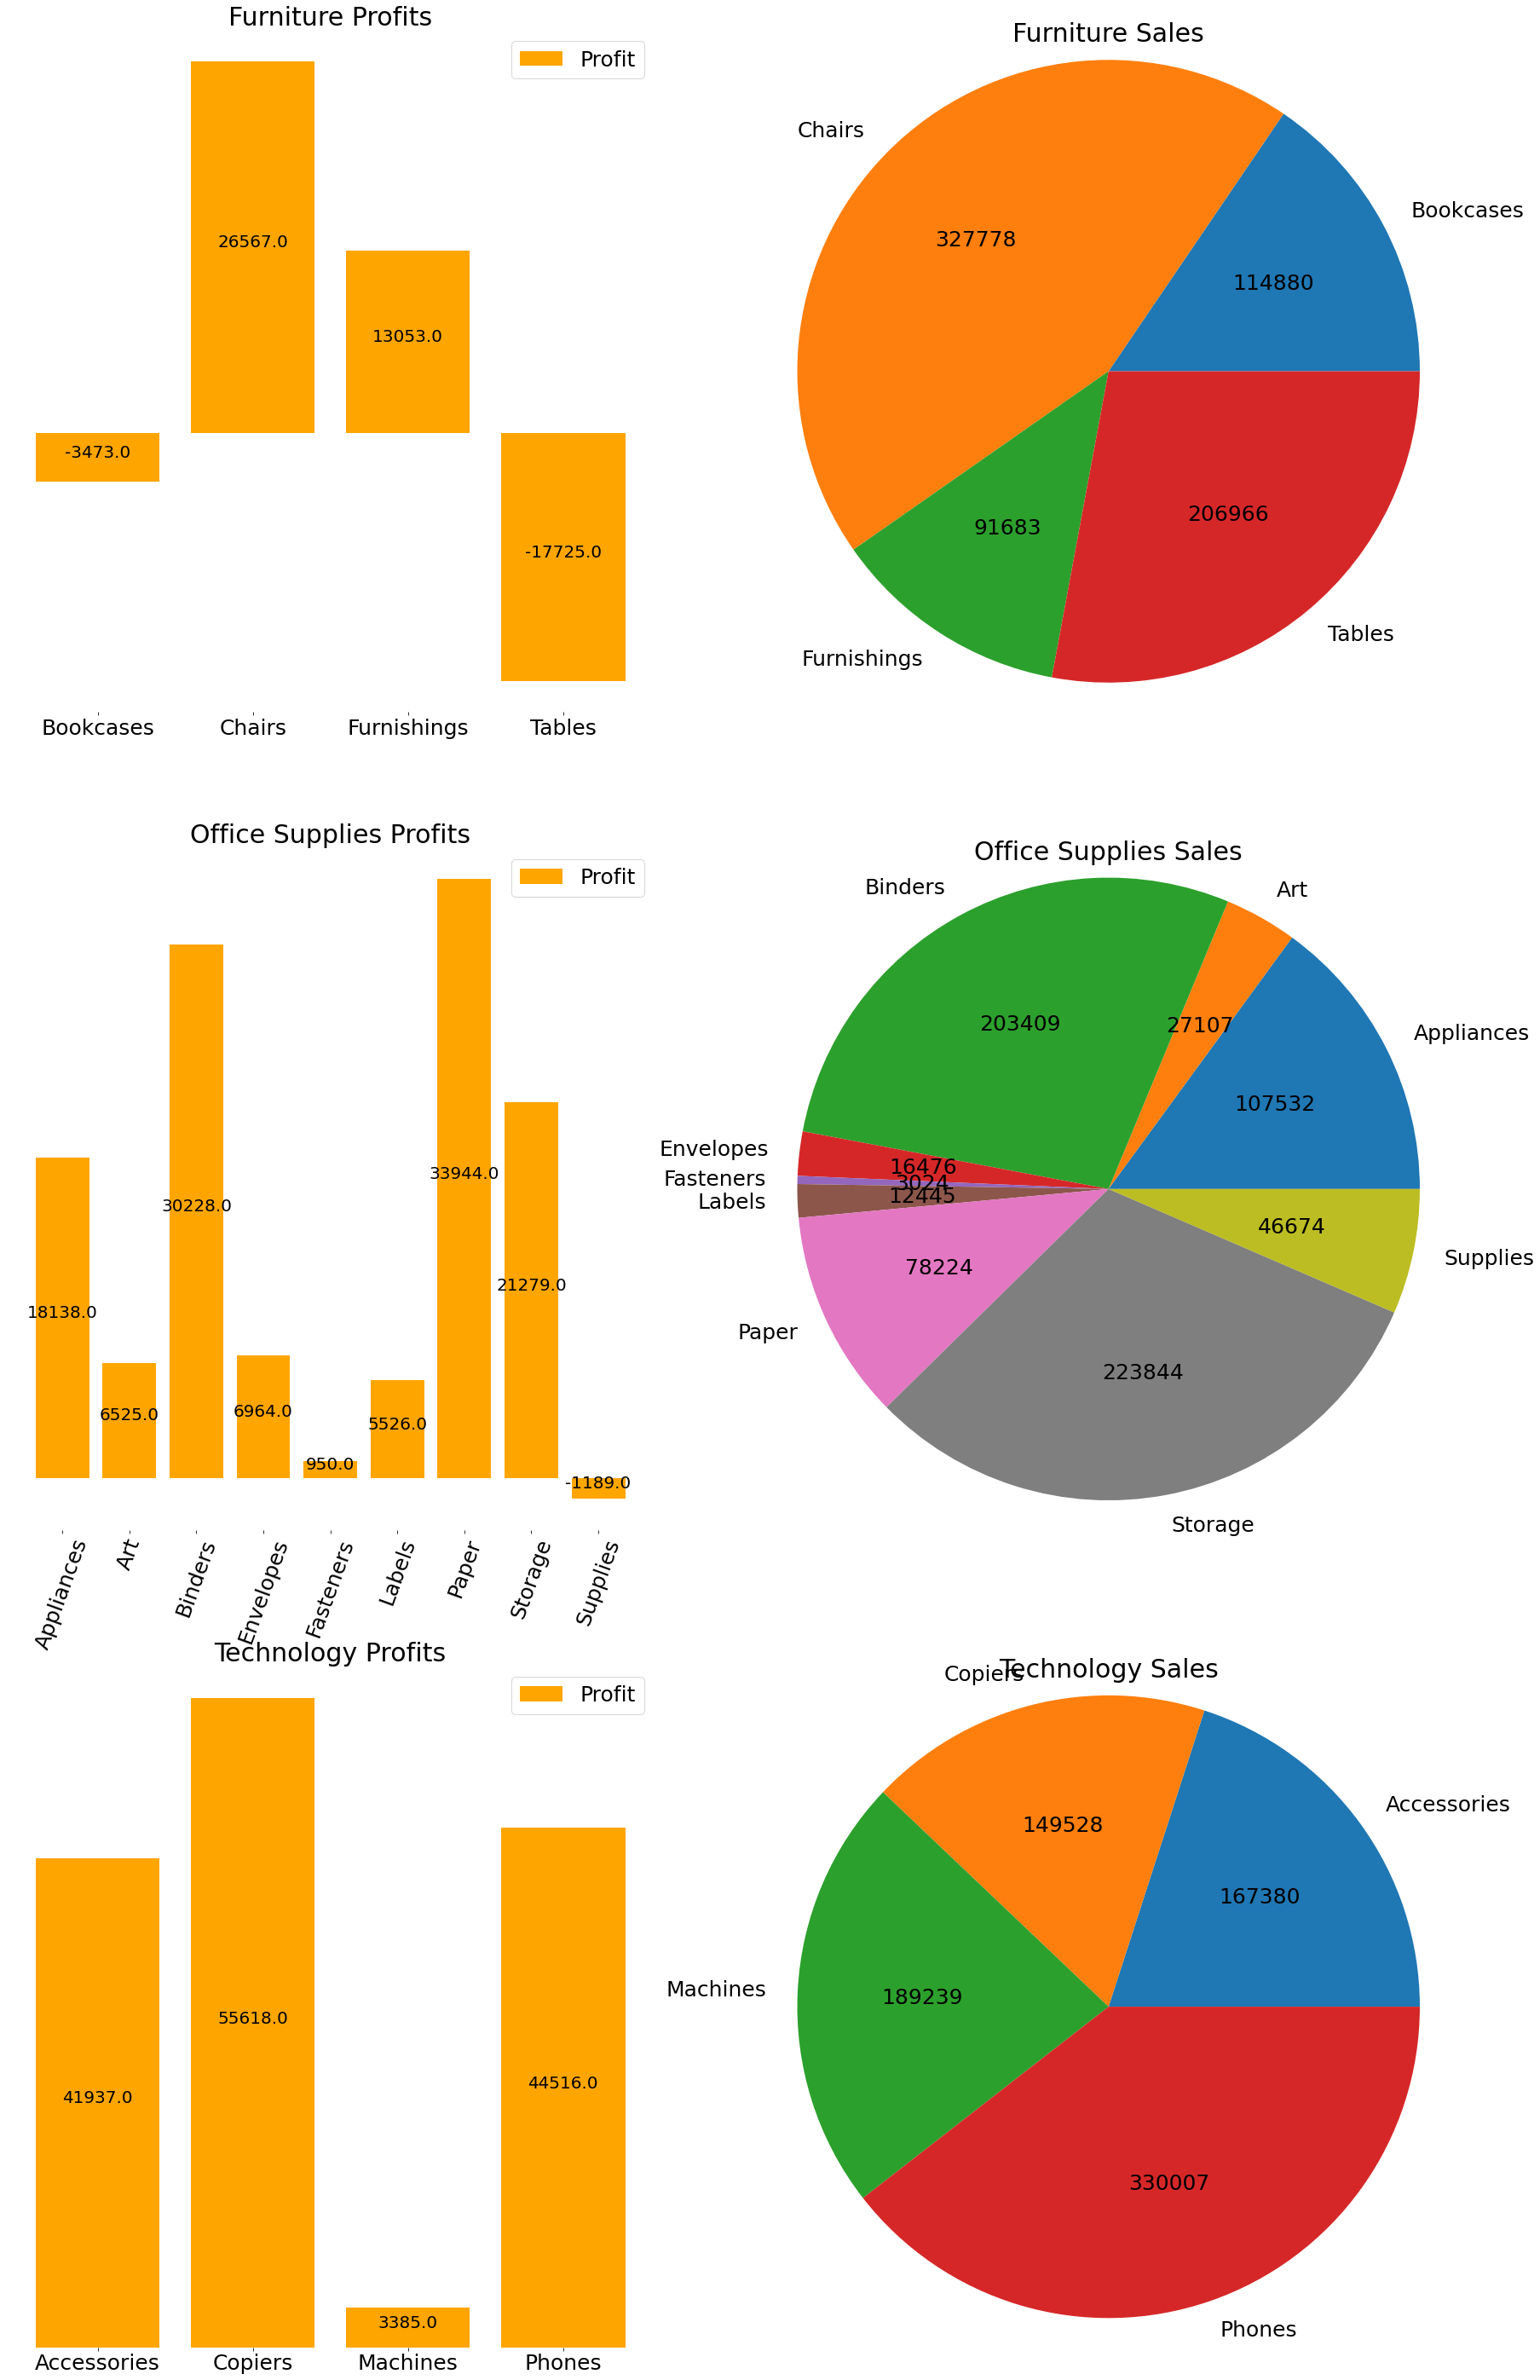

In [150]:
sub_cat = df.groupby(by = ['Category','Sub-Category']).agg(sum).reset_index()
mainCategories = sub_cat['Category'].unique()
fig,axes = plt.subplots(len(mainCategories),2,figsize=(30,50))
#plt.title("Subcategory vise Profit")
for col in range(2):
    for row,cat in zip(range(3),mainCategories):
        ax = axes[row][col]
        if col == 0:
            
            ax.tick_params(labelsize=25)
            ax.set_title(str(cat)+" Profits",fontsize=30)
            ax.get_yaxis().set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            
            temp = sub_cat[sub_cat['Category']==cat]
            netProfit = temp['Profit']
            bars = ax.bar(temp['Sub-Category'],netProfit,color='orange',label='Profit')
            ax.legend(fontsize=25)
            if len(bars) > 5:
                ax.xaxis.set_tick_params(rotation=70)
            for bar,prof in zip(bars,netProfit):
                h = 1 if prof > 0 else -1
                ax.text(bar.get_x()+bar.get_width()/2,prof*0.5,str(round(prof,0)),horizontalalignment='center',color='black',fontsize=20)
        else:
            ax.set_title(str(cat)+' Sales',fontsize=30)
            def value(val):
                s = sub_cat[sub_cat['Category']==cat]['Sales'].sum()
                return int(round(s*val/100,0))
            sales = sub_cat[sub_cat['Category']==cat]['Sales']
            labels = sub_cat[sub_cat['Category']==cat]['Sub-Category']
            ax.pie(sales,labels=labels,autopct=value,radius=1.2,textprops={'fontsize':'25'})


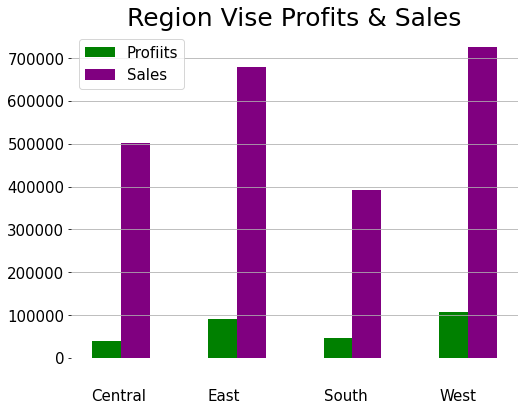

In [151]:
region = df.groupby('Region').agg(sum).reset_index()
labels = region['Region']
values = [region['Profit'] ,region['Sales']]
rg = region['Region']

plt.figure(figsize=(8,6))
plt.title("Region Vise Profits & Sales",fontsize=25)
x = np.array(range(0,8,2))

bars1 = plt.bar(x-0.5,values[0],width=0.5,label='Profiits',color='green')
bars2 = plt.bar(x,values[1],width=0.5,label='Sales',color='purple')
plt.yticks()
ax = plt.gca().axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
for bar1,bar2,txt in zip(bars1,bars2,rg):
    ax.text(bar1.get_x(),-100000,txt,fontsize=15)
plt.yticks(fontsize=15)    
plt.grid(axis='y')
plt.legend(fontsize=15)
plt.show()

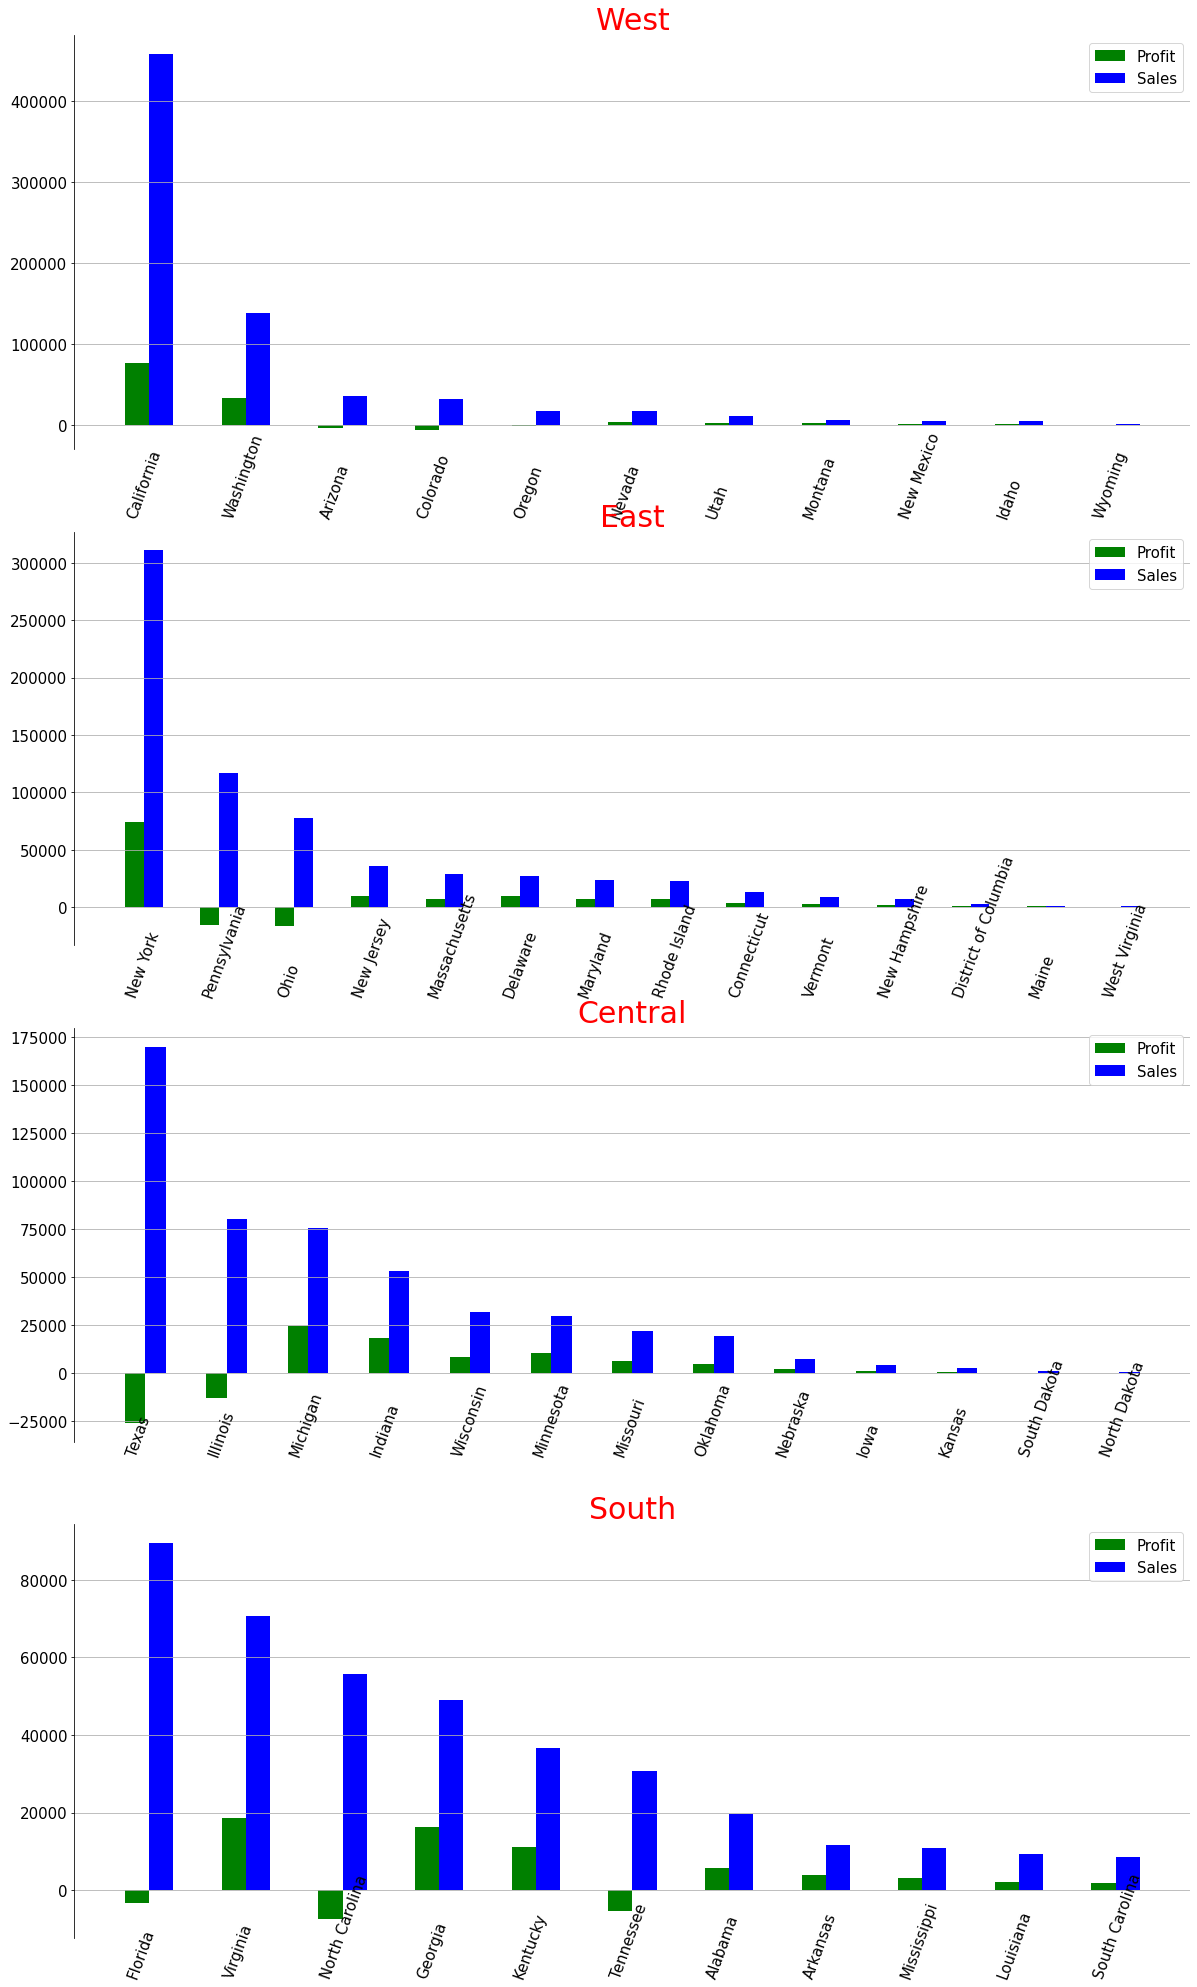

In [152]:
region_state = df.groupby(['Region','State']).agg(sum).reset_index().sort_values(by='Sales',ascending=False)
regions = region_state['Region'].unique()

fig,axes = plt.subplots(4,1,figsize=(20,35))
plt.yticks(fontsize=15)
for ax,rg in zip(axes,regions):
    ax.set_title(str(rg),fontsize=30,color='red')
    temp = region_state[region_state['Region']==rg]
    x = np.array(range(0,2*len(temp),2))
    
    ax.get_xaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    bars1 = ax.bar(x-0.5,temp['Profit'],width=0.5,label='Profit',color='green')
    ax.bar(x,temp['Sales'],width=0.5,label='Sales',color='blue')
    ax.tick_params(labelsize=15)
    states = temp['State']
    y = -1*max(temp['Sales'])/4
    for bar,state in zip(bars1,states):
        ax.text(bar.get_x(),y,state,rotation=70,fontsize=15)
    
    ax.grid()
    ax.legend(fontsize=15)


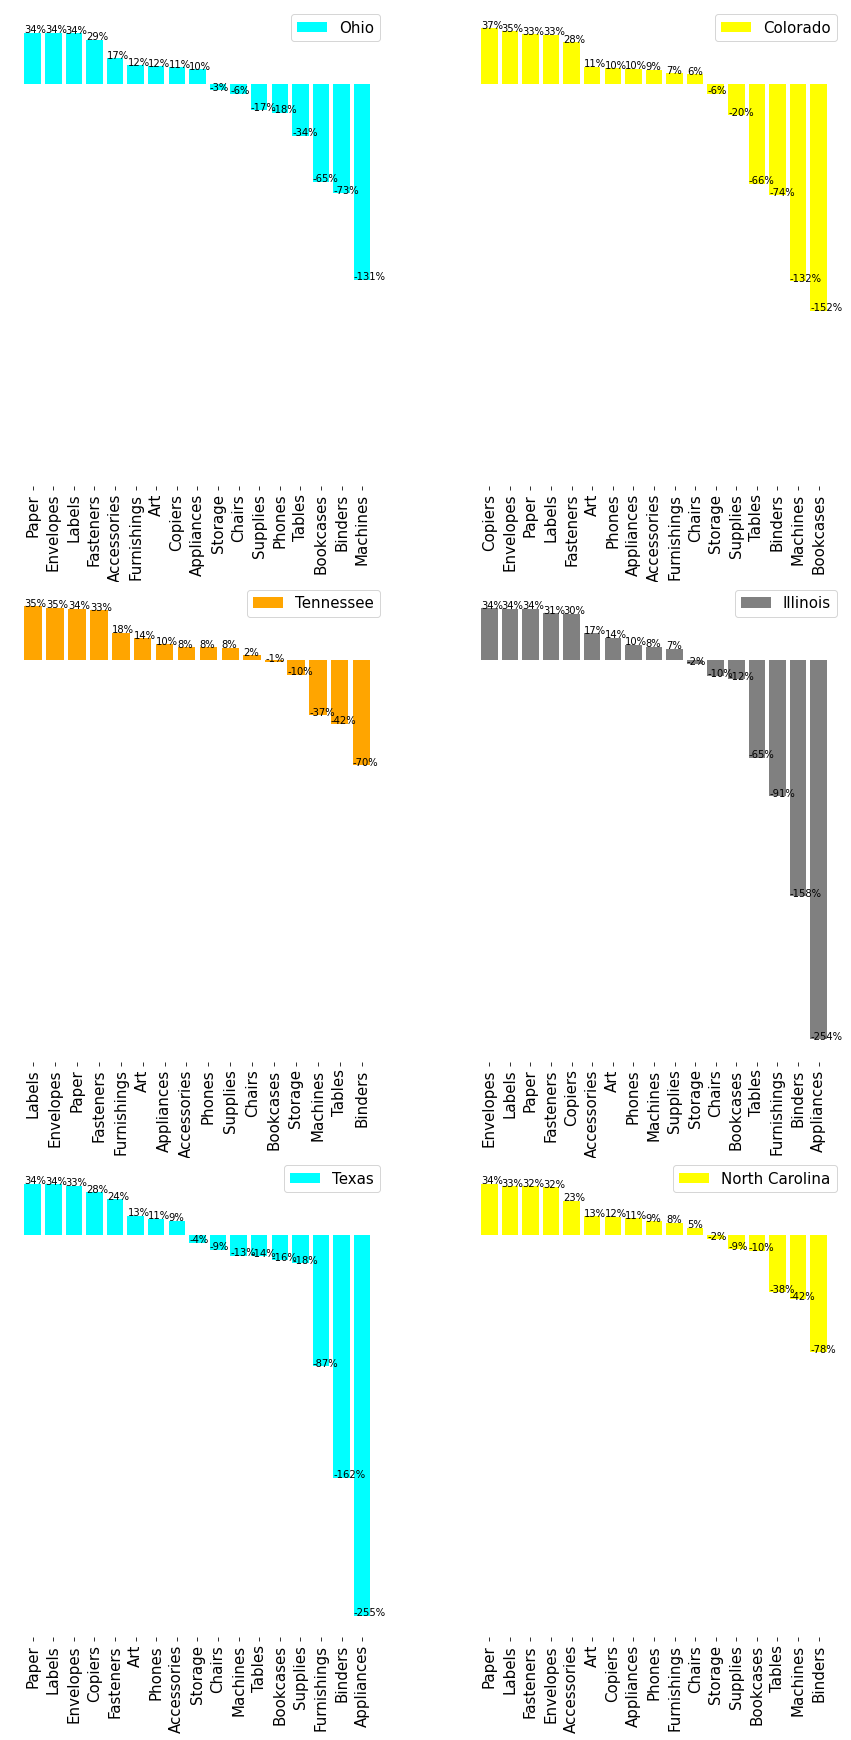

In [153]:
region_state['Proft_Percentage'] = (100*region_state['Profit']/region_state['Sales'])
region_state
weak_states = region_state.sort_values(by='Proft_Percentage')['State'].iloc[:7]
fig,axes = plt.subplots(3,2,figsize=(15,30),sharey=True)
colors=['cyan','yellow','orange','gray','cyan','yellow']
# for ax,st in zip(axes,weak_states):
ind = len(weak_states)//2
for i in range(ind):
    for j in range(2):
        ax = axes[i][j]
        st = weak_states.iloc[i*2+j]
        #ax.set_title("State: "+str(st),fontsize=25)
        temp = df[df['State'] == st].groupby('Sub-Category').agg(sum).reset_index()
        temp['Perc'] = 100*temp['Profit']/temp['Sales']
        temp.sort_values(by='Perc',inplace=True,ascending=False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_ylabel(str(st)+"/'s Profits")
        ax.tick_params(axis="x",labelsize=15,rotation=90)
        bars = ax.bar(temp['Sub-Category'],100*(temp['Profit']/temp['Sales']),color=colors[i*2+j],label=str(st))
        
        #ax.text(0,-20,"Profit",rotation=90,fontsize=10)
        #ax.text(0,min(100*(temp['Profit']/temp['Sales']))/2,str(st),rotation=0,fontsize=25,color='red')
        for bar,profit in zip(bars,100*temp['Profit']/temp['Sales']):
            ax.text(bar.get_x(),profit,str(int(profit))+"%")
        ax.legend(fontsize=15)